<a href="https://colab.research.google.com/github/pranonrahman/DIP-2021-Tasks/blob/main/DIP_Lab_5_170041014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lab 5
#### Task 1
Implement the morphological Dilation and Erosion on Binary images.
Show the effects of repeated applications of both Dilation and Erosion.
**Note:** You cannot use built-in libraries.


#### Task 2
Complete the solutions to exercise $9.36$ of Chapter $09$ (Textbook) \\
A preprocessing step in an application of microscopy is concerned with the issue of isolating individual round particles from similar particles that overlap in
groups of two or more particles (see following image). Assuming that all particles are of the same size, propose a morphological algorithm that produces three
images consisting respectively of 
(a) Only of particles that have merged with the boundary of the image.
(b) Only overlapping particles.
(c) Only nonoverlapping particles.

#### Task 3 
Complete the solutions to exercise $9.34$ of Chapter $09$ (Textbook) \\
Consider the image given, which shows a region of small circles enclosed by a region of larger circles. Locate the boundary between those distinct texture regions.

#### Task 4 
Granulometry is a field that deals with determining the size distribution of particles in an image. Determine the sizes of granules in Fig. 9.41(a) which is an image of wood dowel plugs of two dominant sizes.
Apply smoothing on the given image before you apply the Opening operations with circular SEs of variables sizes.


# Student Details
Raian Rahman \\
Student id: 170041014 \\
Dept. of Computer Science and Engieering \\
Islamic University of Technology \\
Gazipur, Bangladesh

In [ ]:
!pip3 install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9673 sha256=895e495fc71f36a101ec96a8b36104b2c90557085ae5945743223431823b48f4
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
#for iterating through the files and clearing output from the notebook  
import os
from IPython.display import clear_output


#Required Library for HSI
import cv2

#Requred library for editing the files
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!wget -r 'http://www.imageprocessingplace.com/downloads_V3/dip3e_downloads/dip3e_book_images/DIP3E_CH09_Original_Images.zip'

--2021-08-03 09:59:21--  http://www.imageprocessingplace.com/downloads_V3/dip3e_downloads/dip3e_book_images/DIP3E_CH09_Original_Images.zip
Resolving www.imageprocessingplace.com (www.imageprocessingplace.com)... 74.208.236.87
Connecting to www.imageprocessingplace.com (www.imageprocessingplace.com)|74.208.236.87|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2410428 (2.3M) [application/zip]
Saving to: ‘www.imageprocessingplace.com/downloads_V3/dip3e_downloads/dip3e_book_images/DIP3E_CH09_Original_Images.zip’

www.imageprocessing 100%[===================>]   2.30M  6.74MB/s    in 0.3s    

2021-08-03 09:59:22 (6.74 MB/s) - ‘www.imageprocessingplace.com/downloads_V3/dip3e_downloads/dip3e_book_images/DIP3E_CH09_Original_Images.zip’ saved [2410428/2410428]

FINISHED --2021-08-03 09:59:22--
Total wall clock time: 0.5s
Downloaded: 1 files, 2.3M in 0.3s (6.74 MB/s)


In [ ]:
!unzip -q '/content/www.imageprocessingplace.com/downloads_V3/dip3e_downloads/dip3e_book_images/DIP3E_CH09_Original_Images.zip' -d '/content/data'

## Task 1: Implement Eroison and Dilation on binray images
In this task, we have to implement eroison and dilation on **binary image**. In binary image, a image has only 2 values. 
* $0$ representing black 
* $255$ representing white. 

To get a binary image, we can perform thresholding operation. The threshold value is a hyperparameter. In simple words, eroison operation is nothing but min filter and dilation is nothing but max filter. So, we can use that for our task. The code is implemented below:

In [ ]:
def threshold(image, threshold_value = 135):
    """
    This function takes an image and return a binary image after applying thresholding operation. 
    """
    data = np.array(image)
    #data.setflags(write=1)
    #print(f'Shape of the image is: {data.shape}')
    rows,cols = data.shape
    for row in range(0,rows):
        for pixel in range(0,cols):
            if data[row][pixel] <= threshold_value:
                data[row][pixel] = 0.0
            else:
                data[row][pixel] = 255
    image = Image.fromarray(data)
    return image

In [ ]:
def zero_pad_image(image, image_height, image_width, pad):
    """
    This function adds zero padding to an image. Here we are assuming the image has a uniform padding size. 
    """
    # print(image_height)
    # print(image_width)
    pad = pad//2
    padded_height = image_height+2*pad
    padded_width =  image_width+2*pad
    # print(padded_height, padded_width)
    padded_image = np.zeros((padded_height, padded_width ))

    padded_image[pad:image_height+pad  , pad:image_width+pad] = image
    # for row in padded_image:
    #     for column in row:
    #         for channel in column:
    #             if(channel > 255 or channel <0):
    #                 print("ekhane: ",channel)
    # print("eta")
    # print(image.shape)
    # print(padded_image.shape)
    return padded_image

In [ ]:
def eroison(image, neighbour_region, padding = 'same', stride = 1):
    """
    This filter implements the non_linear_filtering operation along with the convolution. The parameters of the operation are:
    image: the input image
    neighbour_region: an integer representing the region where that we will be considered for operation
    type: it is a string that defines the type of operaration
    padding: here we set the value of padding. If the padding is same then we calculate the padding size
    stride: the amount of strides
    """
    image = np.array(image)
    # print(image.shape)


    image_height = image.shape[0]
    image_width =  image.shape[1]

    if padding == 'same':
        print('here')
        pad = ((stride-1)*image_width-stride+neighbour_region)/2
    else:
        pad = padding
    print(pad)
    padded_image = zero_pad_image(image, image_height, image_width, int(pad))

    # image_height = padded_image.shape[0]
    # image_width =  padded_image.shape[1]

    output_image = np.zeros(image.shape)
    # print(padded_image.shape)
    # padded_image = Image.fromarray(padded_image.astype('uint8'))
    
    # display(padded_image)

    for y in range(image_width):
        if y > image_width - neighbour_region:
            # it means the convolution has ended
            break
        

        for x in range(image_height):
            if x > image_height - neighbour_region:
                break

            try:
                if x%stride==0:
                    # print("ekhane")
                    # print(result)

                    output_image[x,y] = (padded_image[x:x+neighbour_region, y:y+neighbour_region]).min()
                        
            except:
                break
    print(neighbour_region, output_image.shape)
    output = Image.fromarray(output_image.astype('uint8'))
    return output

In [ ]:
def dilation(image, neighbour_region, padding = 'same', stride = 1):
    """
    This filter implements the non_linear_filtering operation along with the convolution. The parameters of the operation are:
    image: the input image
    neighbour_region: an integer representing the region where that we will be considered for operation
    type: it is a string that defines the type of operaration
    padding: here we set the value of padding. If the padding is same then we calculate the padding size
    stride: the amount of strides
    """
    image = np.array(image)
    print(image.shape)


    image_height = image.shape[0]
    image_width =  image.shape[1]

    if padding == 'same':
        pad = ((stride-1)*image_width-stride+neighbour_region)/2
    else:
        pad = padding

    padded_image = zero_pad_image(image, image_height, image_width, int(pad))

    output_image = np.zeros(image.shape)
    # print(padded_image.shape)
    # padded_image = Image.fromarray(padded_image.astype('uint8'))
    
    # display(padded_image)

    for y in range(image_width):
        if y > image_width - neighbour_region:
            # it means the convolution has ended
            break
        
        if y % stride == 0:
            for x in range(image_height):
                if x > image_height - neighbour_region:
                    break

                try:
                    if x%stride==0:
                        # print("ekhane")
                        # print(result)

                        output_image[x,y] = (padded_image[x:x+neighbour_region, y:y+neighbour_region]).max()
                        
                except:
                    break
    
    output = Image.fromarray(output_image.astype('uint8'))
    return output

here
0.0
1 (486, 486)
here
2.0
5 (486, 486)
here
7.0
15 (486, 486)
here
22.0
45 (486, 486)


Text(0.5, 1.0, 'Image with eroison size 45')

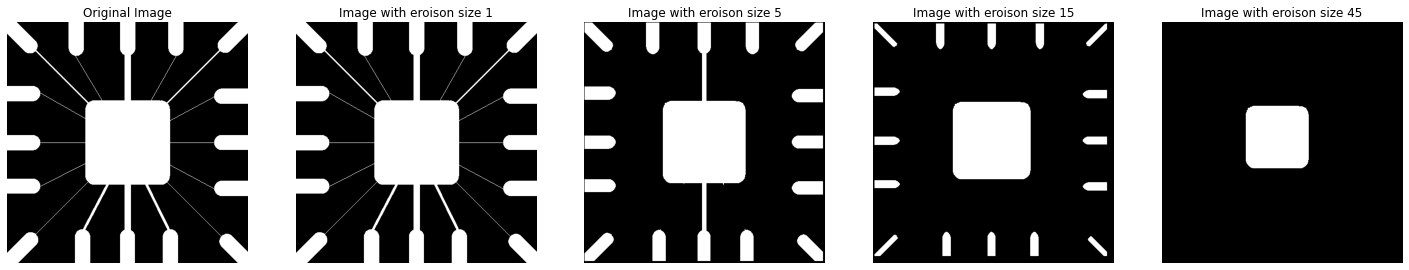

In [ ]:
image = Image.open('/content/data/DIP3E_Original_Images_CH09/Fig0905(a)(wirebond-mask).tif')

fig = plt.figure(figsize = (25,25))
index = 1

fig.add_subplot(1,5,index)
plt.imshow(image, cmap ='gray')
plt.axis('off')
plt.title(f'Original Image')

index += 1
fig.add_subplot(1,5,index)
plt.imshow(eroison(image, 1, padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with eroison size {1}')

index += 1
fig.add_subplot(1,5,index)
plt.imshow(eroison(image, 5, padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with eroison size {5}')

index += 1
fig.add_subplot(1,5,index)
plt.imshow(eroison(image, 15, padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with eroison size {15}')


index += 1
fig.add_subplot(1,5,index)
plt.imshow(eroison(image, 45, padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with eroison size {45}')

## Effect of repeated eroison

here
2.0
5 (486, 486)
here
2.0
5 (486, 486)
here
2.0
5 (486, 486)
here
2.0
5 (486, 486)
here
5.0
11 (486, 486)


Text(0.5, 1.0, 'Applying eroison with SE 11')

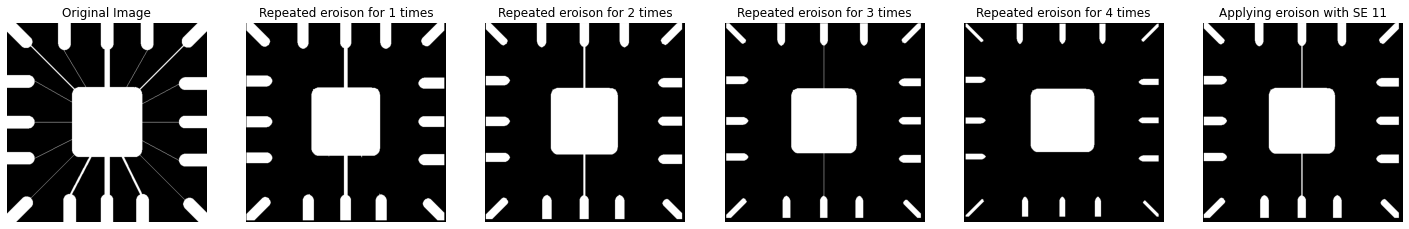

In [ ]:
image = Image.open('/content/data/DIP3E_Original_Images_CH09/Fig0905(a)(wirebond-mask).tif')
original_image = image

fig = plt.figure(figsize = (25,25))
index = 1

fig.add_subplot(1,6,index)
plt.imshow(image, cmap ='gray')
plt.axis('off')
plt.title(f'Original Image')

index += 1
fig.add_subplot(1,6,index)
image = eroison(image, 5, padding = 'same')
plt.imshow(image, cmap ='gray')
plt.axis('off')
plt.title(f'Repeated eroison for {index-1} times')

index += 1
fig.add_subplot(1,6,index)
image = eroison(image, 5, padding = 'same')
plt.imshow(image, cmap ='gray')
plt.axis('off')
plt.title(f'Repeated eroison for {index-1} times')

index += 1
fig.add_subplot(1,6,index)
image = eroison(image, 5, padding = 'same')
plt.imshow(image, cmap ='gray')
plt.axis('off')
plt.title(f'Repeated eroison for {index-1} times')

index += 1
fig.add_subplot(1,6,index)
image = eroison(image, 5, padding = 'same')
plt.imshow(image, cmap ='gray')
plt.axis('off')
plt.title(f'Repeated eroison for {index-1} times')

index += 1
fig.add_subplot(1,6,index)
image = eroison(original_image, 11, padding = 'same')
plt.imshow(image, cmap ='gray')
plt.axis('off')
plt.title(f'Applying eroison with SE {11}')

#### Observation
In previous block, the output of applying eroison on an image with different structural element size. From there we can see that, if the structural element size is greater than the region, the region gets vanished. 

In later block, the effect of repeated dilation is shown. In each case we used an structural element of size $5$. As we can see, the output is similar to implementing same a eroison with structural element of $9$

(444, 508)
(444, 508)
(444, 508)
(444, 508)


Text(0.5, 1.0, 'Image with dilation size 15')

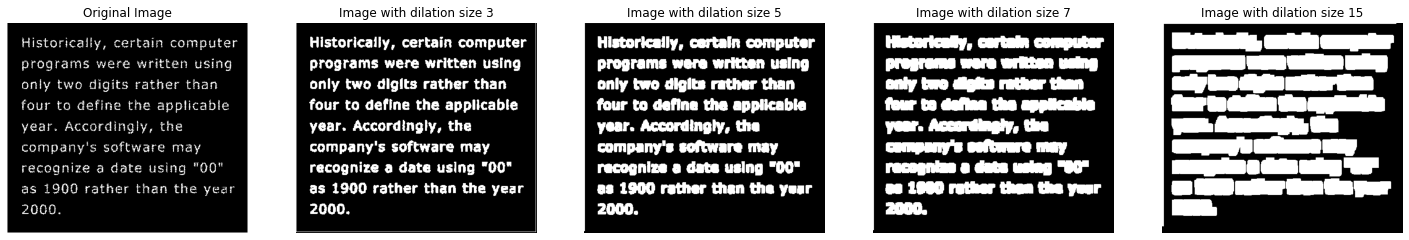

In [ ]:
image = Image.open('/content/data/DIP3E_Original_Images_CH09/Fig0907(a)(text_gaps_1_and_2_pixels).tif')

fig = plt.figure(figsize = (25,25))
index = 1

fig.add_subplot(1,5,index)
plt.imshow(image, cmap ='gray')
plt.axis('off')
plt.title(f'Original Image')

index += 1
fig.add_subplot(1,5,index)
plt.imshow(dilation(image, 3, padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with dilation size {3}')

index += 1
fig.add_subplot(1,5,index)
plt.imshow(dilation(image, 5, padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with dilation size {5}')

index += 1
fig.add_subplot(1,5,index)
plt.imshow(dilation(image, 7, padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with dilation size {7}')


index += 1
fig.add_subplot(1,5,index)
plt.imshow(dilation(image, 15, padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with dilation size {15}')

## Repeated Dilation

(444, 508)
(444, 508)
(444, 508)
(444, 508)


Text(0.5, 1.0, 'Repeated dilation for 4 times')

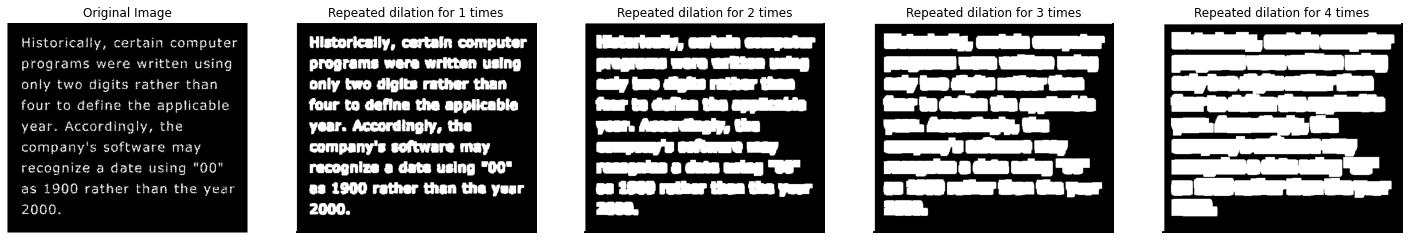

In [ ]:
image = Image.open('/content/data/DIP3E_Original_Images_CH09/Fig0907(a)(text_gaps_1_and_2_pixels).tif')

fig = plt.figure(figsize = (25,25))
index = 1

fig.add_subplot(1,5,index)
plt.imshow(image, cmap ='gray')
plt.axis('off')
plt.title(f'Original Image')

index += 1
fig.add_subplot(1,5,index)
image = dilation(image, 5, padding = 'same')
plt.imshow(image, cmap ='gray')
plt.axis('off')
plt.title(f'Repeated dilation for {index-1} times')



index += 1
fig.add_subplot(1,5,index)
image = dilation(image, 5, padding = 'same')
plt.imshow(image, cmap ='gray')
plt.axis('off')
plt.title(f'Repeated dilation for {index-1} times')


index += 1
fig.add_subplot(1,5,index)
image = dilation(image, 5, padding = 'same')
plt.imshow(image, cmap ='gray')
plt.axis('off')
plt.title(f'Repeated dilation for {index-1} times')


index += 1
fig.add_subplot(1,5,index)
image = dilation(image, 5, padding = 'same')
plt.imshow(image, cmap ='gray')
plt.axis('off')
plt.title(f'Repeated dilation for {index-1} times')

### Discussion
In this section we discuss the effect of dilation on an image. For the reference image we have a text image. The text in the image is quite distorted. If we use a structural element of size of half of $distance\_beween\_two\_pixel$, then the detached pixels gets connected. But the issue is if the structural element size is too large, then the whole shapes gets in box shape. 

Then, the effect of repeated dilation is shown. For this, we have the same effect of applying dilation with a higher sized strucutral element.

. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\


## Task 2: Finding different kind of disks in an image

In [ ]:
import cv2

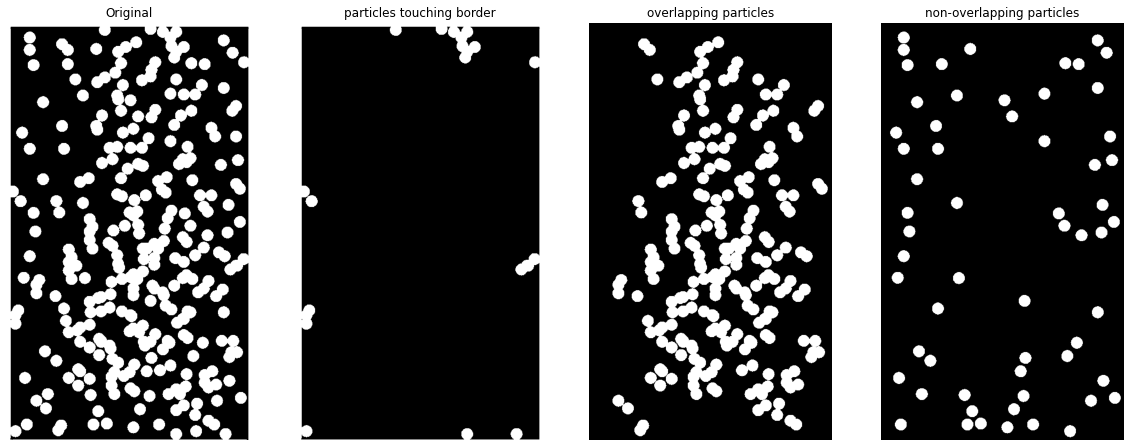

In [ ]:
img = cv2.imread('/content/data/DIP3E_Original_Images_CH09/FigP0936(bubbles_on_black_background).tif',0) 

#extraction of particle touching border
imgBo = img.copy()
m,n = imgBo.shape
     
for i in range(m-1):
  imgBo[i,0] = 255
  imgBo[i, n-1] = 255 

for i in range(n-1):
  imgBo[m-1,i] = 255
  imgBo[0,i] = 255

n1, labels1, stats1, _ = cv2.connectedComponentsWithStats(imgBo)
#print(stats1)

area1 = stats1[:,4]
for i in range(0, n1):
  #area of border connected with particle is > 18000
  if area1[i] < 18000:   
      imgBo[labels1 == i] = 0


#extraction of single particles
imgSi = img.copy()
n2, labels2, stats2, _ = cv2.connectedComponentsWithStats(imgSi)
#print(stats2)

area2 = stats2[:,4]

for i in range(0, n2):
  #area of single particles is between 387 and 392
  if area2[i] < 387 or area2[i] > 392:
      imgSi[labels2 == i] = 0

#extracting overlapped particles
imgO = img.copy()
imgO = img - (imgSi + imgBo)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20, 15))
ax1.axis("off")
ax2.axis("off")
ax3.axis('off')
ax4.axis('off')
ax1.title.set_text('Original')
ax2.title.set_text("particles touching border")
ax3.title.set_text("overlapping particles")
ax4.title.set_text("non-overlapping particles")
ax1.imshow(img, cmap = 'gray')
ax2.imshow(imgBo, cmap = 'gray')
ax3.imshow(imgO, cmap = 'gray')
ax4.imshow(imgSi, cmap = 'gray')

### Discussion
In this task we were asked to find out the overlapped shaped, clipped shapes and normal shapes. For this task we used the connected_component algorithm for this task. For finding out the clipped shape, we add an extra white pixel along the margin of the  image. So we ran connected component analysis with a margin. The shapes we will find will be the clipped shapes. Then, for finding out the overlapped shape, we applyed connected component analysis on every single dots and find out the number of connected pixels. If the pixel count is higher, then it is overlapped. 

In our implementation, connected component function gives us the area as well as the length. Thus using thresholding we can find out the region

. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\

## Task 3: Segmenation between snall circle and large circle

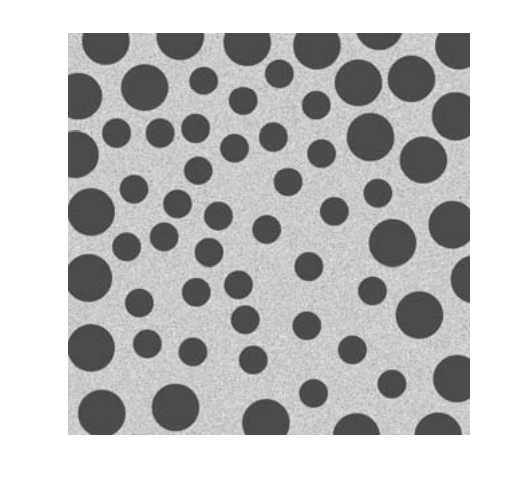

In this picture we have small circles and large circles. Our task is to isolate the region between small circle and large circles. 

- Convert the image to binary image

- For getting the inner region, we had to do closing with a SE which is larger than the radius of the region. 

- Overlay the bounday on top of the grayscale image. With some highlighted value


(nb: for this task we are using scikit image library for our task)



In [ ]:
from skimage.morphology import disk, closing, opening, binary_erosion
from skimage.filters import median
# import skimage.morphology.erosion as Eroison

here
5.0
11 (600, 600)


Text(0.5, 1.0, 'Output image')

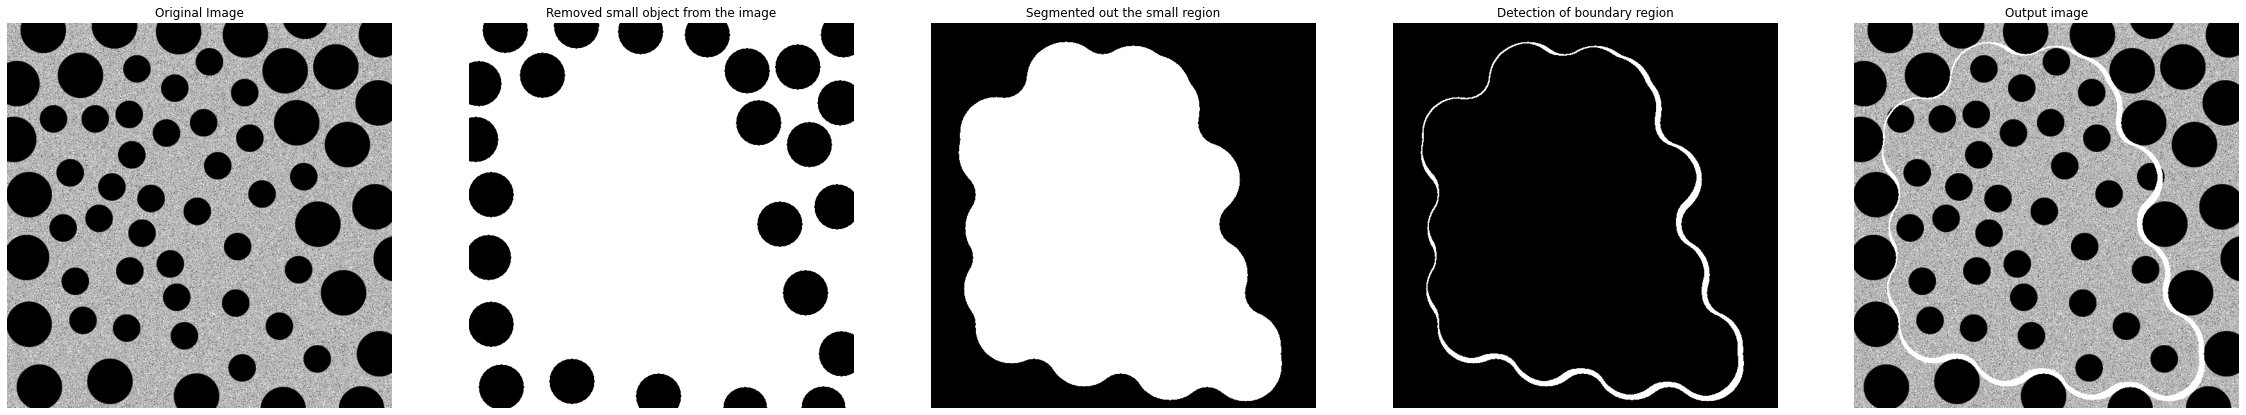

In [ ]:
image = Image.open('/content/data/DIP3E_Original_Images_CH09/FigP0934(blobs_in_circular_arrangement).tif')
binary_image = threshold(image,103)
# display(binary_image)

fig = plt.figure(figsize = (40,40))
index = 1

fig.add_subplot(1,5,index)
plt.imshow(image, cmap ='gray')
plt.axis('off')
plt.title(f'Original Image')


structuring_element_1 = disk(30)
"""
as we want to remove the small object from the image, 
we need to gave a closing operation with structural 
element greaer than the radius of small objects.
"""
removed_small_object_from_image = Image.fromarray(closing(binary_image, structuring_element_1))

index += 1

fig.add_subplot(1,5,index)
plt.imshow(removed_small_object_from_image, cmap ='gray')
plt.axis('off')
plt.title(f'Removed small object from the image')



# display(removed_small_object_from_image)


structuring_element_2 = disk(56)
"""
Now we need to find out the boundary between white region and black region
To do so we can do an opening with a structuring element larger than the distance between two large circle
"""
removed_small_white_region = Image.fromarray(opening(removed_small_object_from_image, structuring_element_2))
display()


index += 1

fig.add_subplot(1,5,index)
plt.imshow(removed_small_white_region, cmap ='gray')
plt.axis('off')
plt.title(f'Segmented out the small region')



"""
Now our task is to find out the boundary. If we run eroison, 
the white region will shrink. Then, we can subtract the eroided 
image from the original image will give us the boundary.
"""
neighbour_hood = np.array([[1]*11]*11)
boundary_detection = Image.fromarray(np.array(removed_small_white_region) - np.array(eroison(removed_small_white_region,11)))
boundary_detection = threshold(boundary_detection)
# display(boundary_detection)

index += 1

fig.add_subplot(1,5,index)
plt.imshow(boundary_detection, cmap ='gray')
plt.axis('off')
plt.title(f'Detection of boundary region')



output_image = np.asarray(image,dtype='uint16') + np.array(boundary_detection)
# print(output_image)
output_image[output_image>255] = 255
# print(output_image)
output_image = np.array(output_image, dtype='uint8')
output_image = Image.fromarray(output_image)
# display(output_image)
index += 1

fig.add_subplot(1,5,index)
plt.imshow(output_image, cmap ='gray')
plt.axis('off')
plt.title(f'Output image')


## Discussion
In this task, we were asked to implement a segmentation operation. Here first we applying thresholding to find out the shapes and make the background pure white. 

After applying the algortihm, we find out the segmeneted region. If we run eroison on segemeted region and subtract the eroided image from the original one, we find out then boundary, Then the boundary was added with the image.

. \
. \
. \
. \
. \
. \
. \
. \
. \
. \
. \
. \
. \
. \

## Task 4

In granulometry, we have different types of disk in an image. We need to find out the size of each disk in the image. 

For this task, we will have to run recursive opening and find out the image difference between global min of each image to find out the size of disks inside the image. 

In [ ]:
import gc

gc.collect()

163

In [ ]:
def find_global_mean(image):
    """
    Returns the mean value of the image.
    """
    return np.array(image,dtype='uint16').mean()

In [ ]:
def process(image):
    global_mean_list = list()
    global_mean_list.append(0)
    global_mean_difference = list()
    global_mean_difference.append(0)
    index = 1
    opened_image = image
    image = Image.fromarray(median(image, disk(3))) 
    image = threshold(image,127)
    fig = plt.figure(figsize = (35,35))

    # display(image)
    for i in range(5,41,1):
        # print(f'Value of structureing element: {i}')
        structuring_element = disk(i)
        opened_image = opening(image,structuring_element)
        fig.add_subplot(8,5,index)
        index += 1
        plt.imshow(opened_image, cmap ='gray')
        plt.axis('off')
        plt.title(f'Opening after SE {i}')
        global_mean = find_global_mean(opened_image)
        # print(global_mean, global_mean_list[-1])
        difference = global_mean_list[-1] - global_mean
        global_mean_list.append(global_mean)
        global_mean_difference.append(difference)

    return global_mean_difference

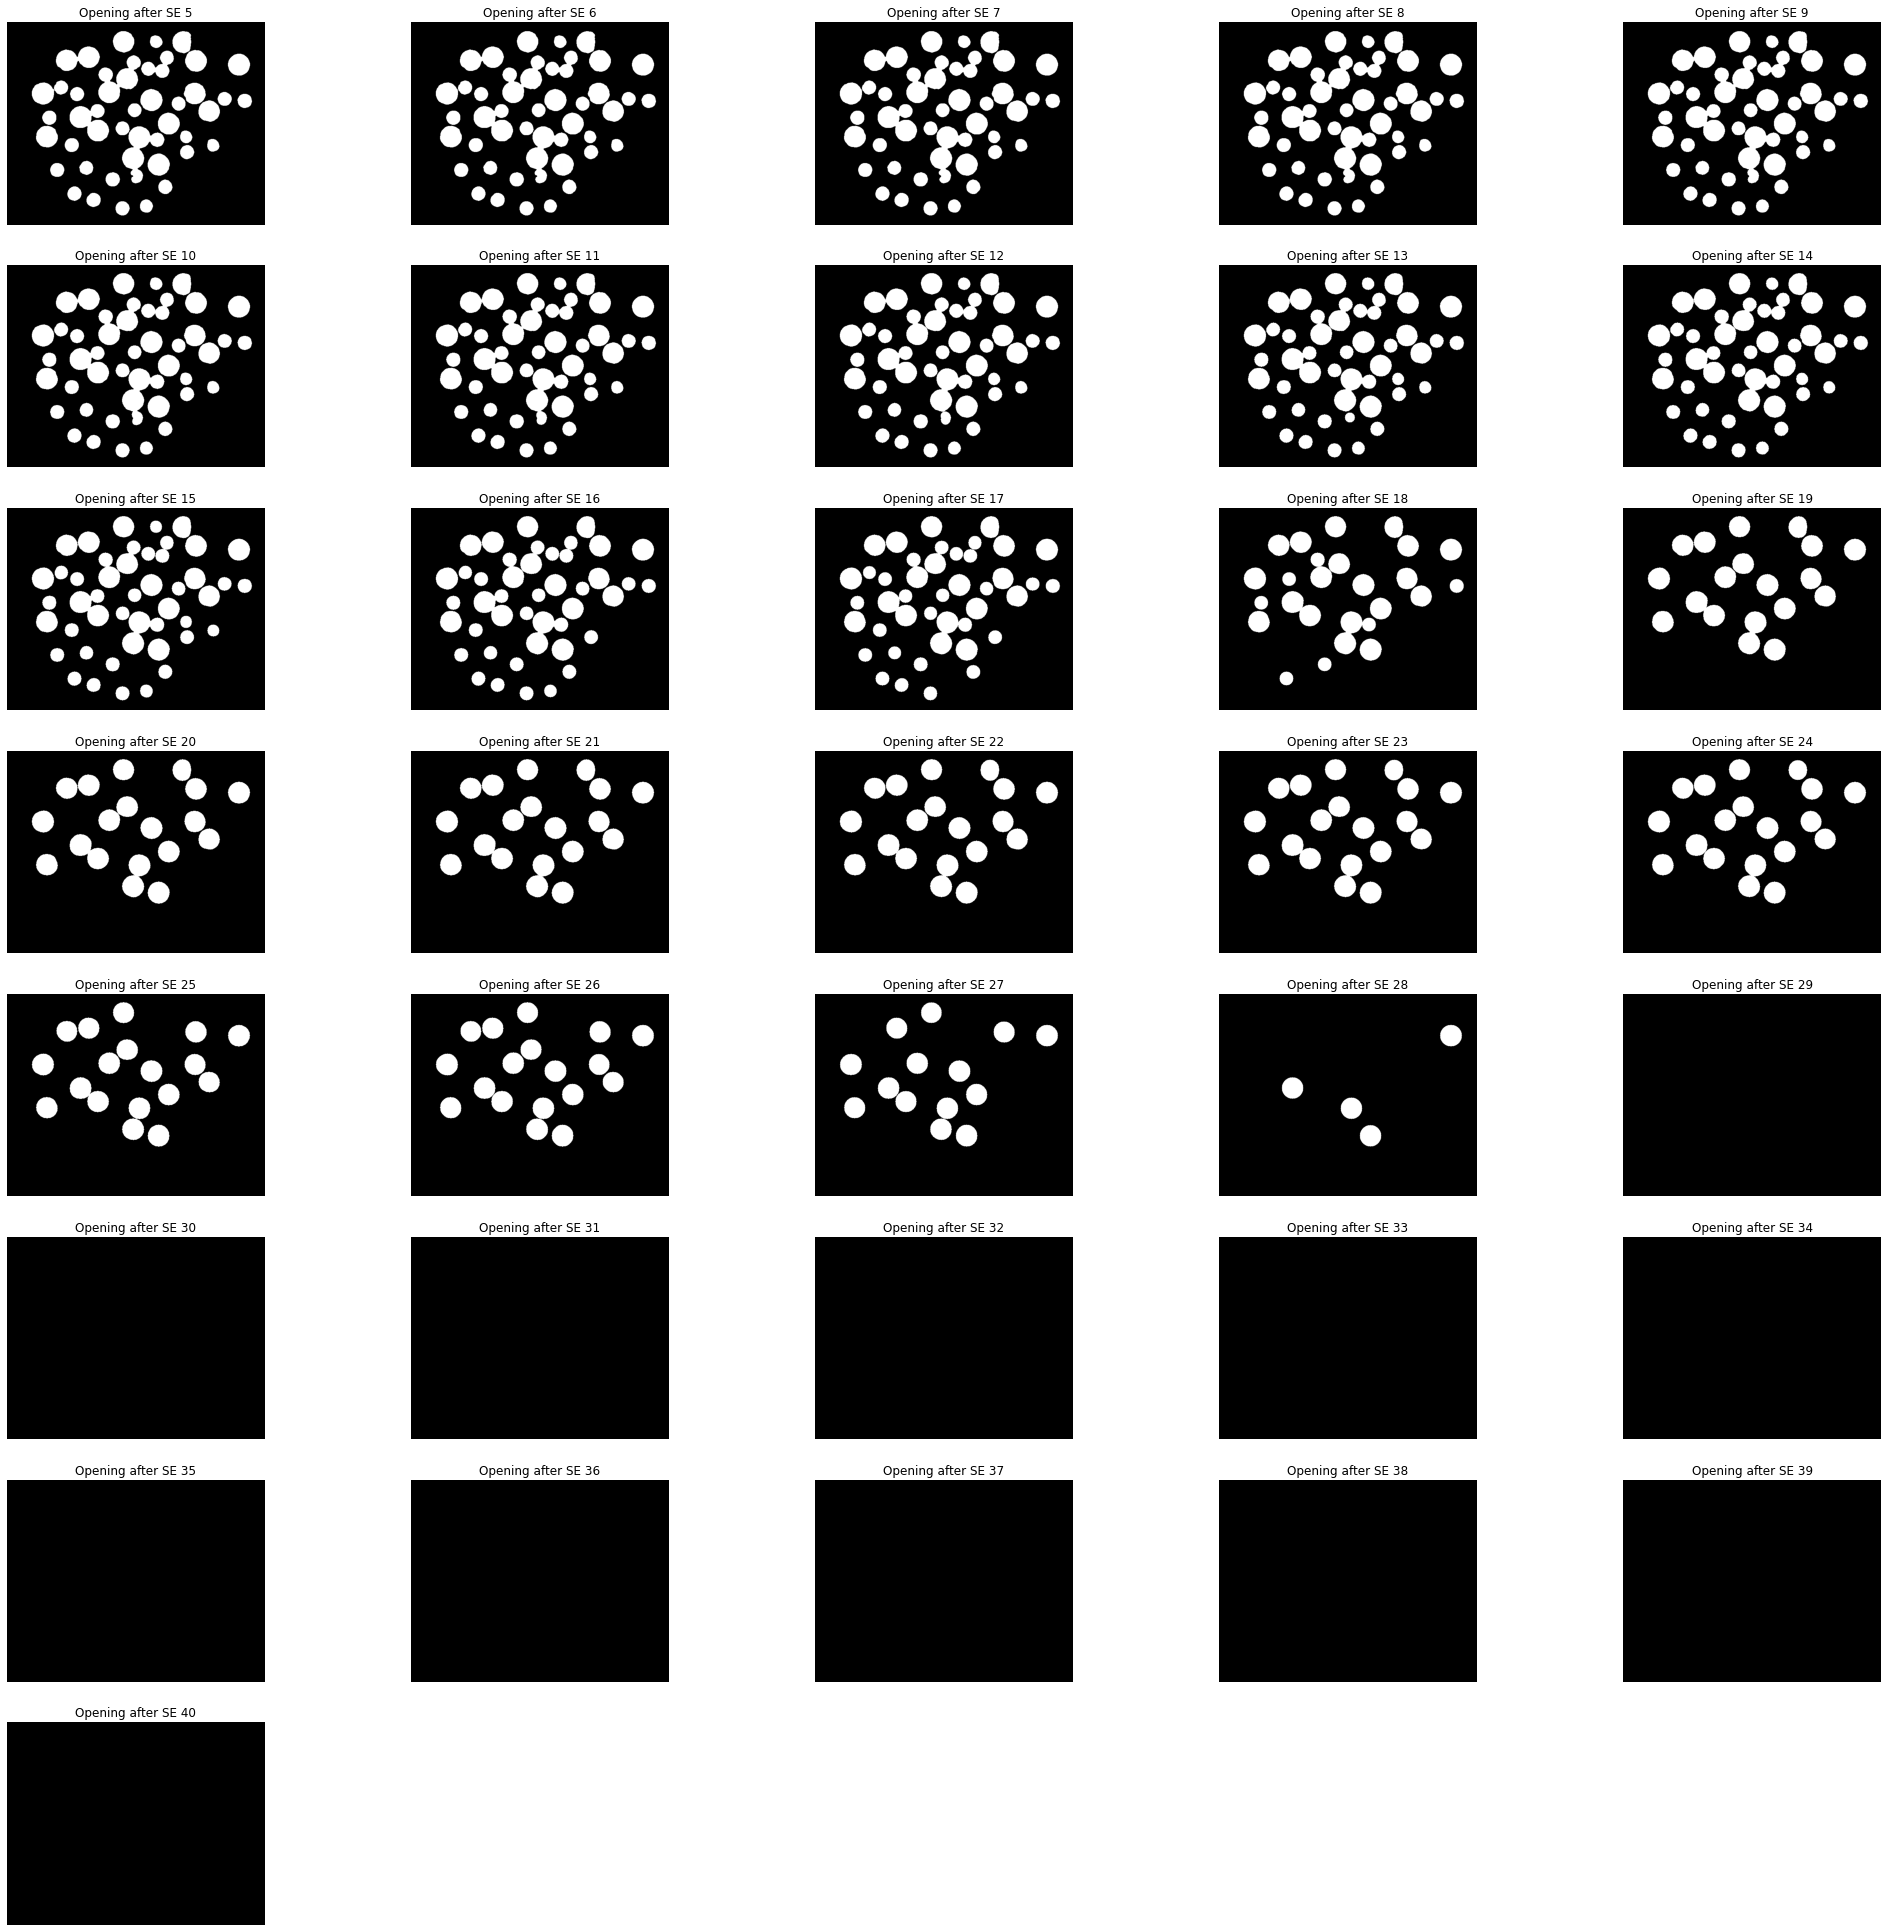

In [ ]:
difference_list = process(Image.open('/content/data/DIP3E_Original_Images_CH09/Fig0941(a)(wood_dowels).tif'))

37
[-55.5198158610588, 0.022766269093956737, 0.05976145637162489, 0.04695543000627822, 0.20347353002720325, -0.001422891818371852, 0.10885122410545733, 0.14157773592802414, 0.43469345051265407, 0.43540489642185065, 0.20276208411801377, 1.8554509311571437, 1.2243984097091456, 11.948734044779243, 5.161540071144593, 0.06403013182674044, 0.08750784682987955, 0.14655785729232207, 0.05976145637162489, 0.25683197321615125, 1.582967147938902, 0.2653693241263859, 6.9102741159238334, 17.280309688219294, 7.021259677756853, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


(-5.0, 25.0)

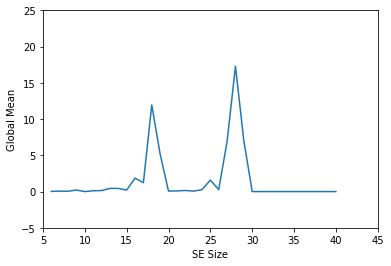

In [ ]:
print(len(difference_list))
print(difference_list[1:])
plt.plot(range(6,41,1),difference_list[2:])
plt.xlabel("SE Size")
plt.ylabel("Global Mean")
plt.xlim(5,45)
plt.ylim(-5,25)

## Discussion
In this task we were asked to find out the size of granules. When we apply opening operation with structural element of size greater than the size of the shape the element gets black. So using this method we can find out the size. 

The diagram shows that the size will be around 16-18 and the size of the bigger shape is around 26-28